# (Binary) Supservised Learning

<img src = "SupervisedLearning.svg" width="90%">

### Supervised Learning Setup

Learn how to generalize a function from examples.  Given a novel input, we want to train a system to estimate that output in a reliably correct way

1. Gather labeled data $D = \{X, Y\}$; $X$ is data points, $Y$ is their labels

2. We need a space of functions $\mathcal{F}$ from which we can choose a function to fit the data.

3. Devise a way of scoring a particular function choice $f$ for how well it fits the data.  We use a *loss function* $\ell$ (an objective function) to do this.  The loss function is minimized when our particular function choice best fits the data

### $f^* = \text{argmin}_{f \in \mathcal{F}} \ell(f, \{X, Y\})$

## Example: Separating Points on A Number Line

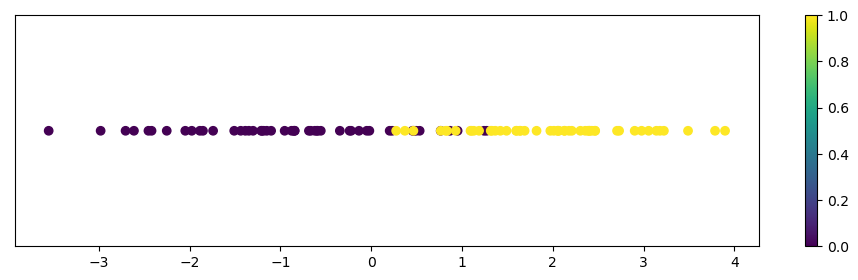

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic dataset of a bunch of numbers labeled 0
# interspersed with another bunch of numbers labeled 1

N = 50
np.random.seed(0)
# x is data, labels
x = np.random.randn(N) - 1
labels = np.zeros(N)
x = np.concatenate((x, np.random.randn(N)+2))
labels = np.concatenate((labels, np.ones(N)))

plt.figure(figsize=(12, 3))
plt.scatter(x, np.zeros(x.size), c=labels)
plt.colorbar()
plt.gca().set_yticks([]);

### Function space

## $f_{c}(x) = \left\{  \begin{array}{cc} 1 & x > c \\ 0 & x \leq c  \end{array} \right\}$

Text(0.5, 1.0, 'Example: c = -1')

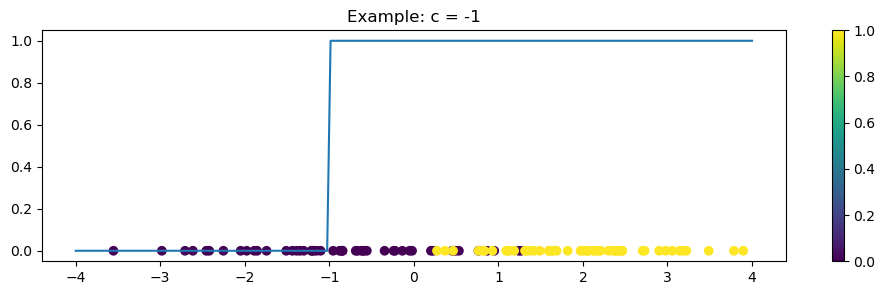

In [2]:
def fc(c, x):
    return np.array(x > c, dtype=float)

pts = np.linspace(-4, 4, 200)
c = -1
y = fc(c=c, x=pts)


plt.figure(figsize=(12, 3))
plt.scatter(x, np.zeros(x.size), c=labels)
plt.colorbar()
plt.plot(pts, y)
plt.title("Example: c = {}".format(c))

### Loss function
## $\ell(f_c, D) = \sum_{(x, y) \in D} (y - f_c(x))^2 $

In [5]:
def loss_squared(X, Y, f):
    return np.sum((Y - f(X))**2)

cs = np.linspace(-3, 3, 1000)
print(cs[1]-cs[0])
losses = np.zeros_like(cs)
for i in range(len(cs)):
    c = cs[i]
    f = lambda x: fc(c=c, x=x)
    losses[i] = loss_squared(x, labels, f)

0.006006006006006093


Let's numerically try a bunch of different functions $f_c$ and see which one minimizes the loss function

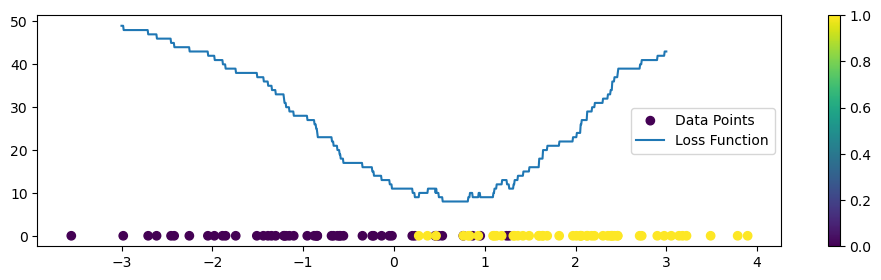

In [4]:
plt.figure(figsize=(12, 3))
plt.scatter(x, np.zeros(x.size), c=labels)
plt.colorbar()
plt.plot(cs, losses)
plt.legend(["Data Points", "Loss Function"])

It looks like a choice of $c = 0.75$ is about the best we can do